## Simulacion de predicciones secuenciales

In [8]:
import numpy as np
import random
import math
import json
import matplotlib.pyplot as plt

In [9]:
class Agent:
  def __init__(self, belief, strategyFunc, scoringRule):
    self.belief = belief
    self.scoringRule = scoringRule
    self.strategyFunc = strategyFunc

  def getBelief(self):
    return self.belief

  def applyStrategy(self, marketState):
    return self.strategyFunc(marketState)
  
  def getScoringRule(self):
    return self.scoringRule
  
class Belief:
  @staticmethod
  def randomBelief():
    return random.uniform(0, 1)

  @staticmethod
  def fixedBelief(belief):
    return belief

  @staticmethod
  def errorBelief(real_probability, delta):
    return real_probability + random.uniform(-delta, delta)

class ScoringRules:
  c = 0.1

  @staticmethod
  def logRule(p, q):
    if ((p == 0 or p == 1) and q != 0 and q != 1):
      return -math.inf
    elif (q == p and (q == 0 or q == 1)):
      return 0
    return round((q * np.log(p) + (1 - q) * np.log((1 - p))), 4)

  @staticmethod
  def brierRule(p, q):
    return -(q * ((1 - p) ** 2) + (1 - q) * (p ** 2))

  @staticmethod
  def quadraticError(p, q):
    return -((p - q) ** 2)

  @staticmethod
  def f(p, q):
    return round((ScoringRules.c * p + (1 - ScoringRules.c) * q), 2)

  @staticmethod
  def getPredictionScore(p_i, q, rule):
    if rule == "log":
      return ScoringRules.logRule(p_i, q)
    elif rule == "brier":
      return ScoringRules.brierRule(p_i, q)
    else:
      return ScoringRules.quadraticError(p_i, q)


In [10]:

def evaluateStrategies(agents, q, rule):
  n = len(agents)
  w = [1/n] * n

  scores, predictions, marketProbability, marketPrediction = simulate(agents, w, q)

  marketPrediction = round(marketPrediction, 2)
  marketScore = ScoringRules.getPredictionScore(marketPrediction, marketProbability, rule)

  results = {
    "scores": scores,
    "predictions": predictions,
    "marketProbability": marketProbability,
    "marketPrediction": marketPrediction,
    "marketScore": marketScore,
  }

  return results

In [15]:
def simulate(agents, w, q):
  n = len(agents)

  scores = [0] * n
  predictions = []

  for i, agent in enumerate(agents):
    p = agent.getBelief()
    predictions.append(p)

  # Calculate market prediction
  marketPrediction = 0
  for i in range(n):
    marketPrediction += w[i] * predictions[i]
  marketProbability = ScoringRules.f(marketPrediction, q)

  # Calculate scores for each agent
  for i, agent in enumerate(agents):
    scores[i] = ScoringRules.getPredictionScore(predictions[i], marketProbability, agent.getScoringRule())

  return scores, predictions, marketProbability, marketPrediction

def plot_brute_force_scores(brute_force_scores):
  probabilities = [score[0] for score in brute_force_scores]
  scores = [score[1] for score in brute_force_scores]

  # plt.figure(figsize=(6, 6))
  plt.plot(probabilities, scores, marker='o')
  plt.title('Brute Force Scores')
  plt.xlabel('Probability')
  plt.ylabel('Score')
  plt.grid(True)
  plt.show()

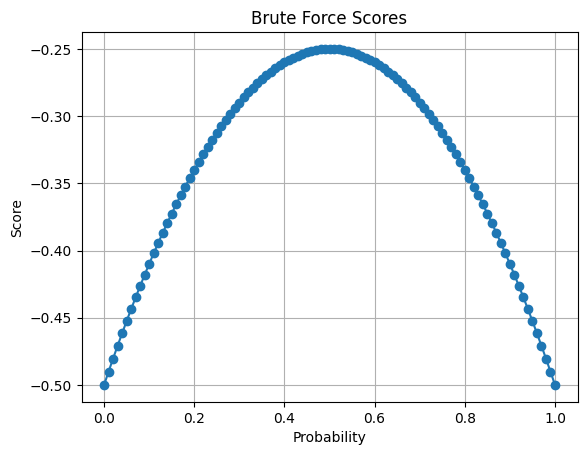

{
  "scores": [
    -0.25318201881284796,
    -0.25606189622122216,
    -0.2517647805511795,
    -0.25020326728583686,
    -0.2566016049779429
  ],
  "predictions": [
    0.4435906141422552,
    0.5778581801818036,
    0.5420092912482408,
    0.4857428163427393,
    0.581250261402305
  ],
  "marketProbability": 0.5,
  "marketPrediction": 0.53,
  "marketScore": -0.2509
}


In [16]:
q = 0.5

agents = [
  Agent(Belief.errorBelief(q, 0.1), None, "brier"),
  Agent(Belief.errorBelief(q, 0.1), None, "brier"),
  # Agent(Belief.errorBelief(q, 0.1), None, "brier"),
  # Agent(Belief.errorBelief(q, 0.1), None, "brier"),
  # Agent(Belief.errorBelief(q, 0.1), None, "brier")
]

results = evaluateStrategies(agents, q, rule="brier")

print(json.dumps(results, indent=2))